<a href="https://colab.research.google.com/github/Himanshu53998/PRODIGY_ML_03/blob/main/ML_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

path = "/content/drive/MyDrive/dogs-vs-cats/train"
print("Path exists:", os.path.exists(path))
print("Number of files:", len(os.listdir(path)))


Path exists: True
Number of files: 17019


In [ ]:
import glob

train_path = "/content/drive/MyDrive/dogs-vs-cats/train"

cat_images = sorted(glob.glob(train_path + "/cat.*.jpg"))
dog_images = sorted(glob.glob(train_path + "/dog.*.jpg"))

print("Cats:", len(cat_images))
print("Dogs:", len(dog_images))

print("Sample cats:", cat_images[:5])
print("Sample dogs:", dog_images[:5])


Cats: 12500
Dogs: 4519
Sample cats: ['/content/drive/MyDrive/dogs-vs-cats/train/cat.0.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/cat.1.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/cat.10.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/cat.100.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/cat.1000.jpg']
Sample dogs: ['/content/drive/MyDrive/dogs-vs-cats/train/dog.0.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/dog.1.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/dog.10.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/dog.100.jpg', '/content/drive/MyDrive/dogs-vs-cats/train/dog.1000.jpg']


In [ ]:
N = 1500   # Reduce to 1000 if RAM error

cat_images = cat_images[:N]
dog_images = dog_images[:N]

print("Total images used:", len(cat_images) + len(dog_images))


Total images used: 3000


In [ ]:
import numpy as np
from PIL import Image
from tqdm import tqdm

IMG_SIZE = 64
X = []
y = []

print("Processing images...")

for img_path in tqdm(cat_images):
    img = Image.open(img_path).convert("L").resize((IMG_SIZE, IMG_SIZE))
    X.append(np.array(img).flatten())
    y.append(0)  # cat

for img_path in tqdm(dog_images):
    img = Image.open(img_path).convert("L").resize((IMG_SIZE, IMG_SIZE))
    X.append(np.array(img).flatten())
    y.append(1)  # dog

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


Processing images...


100%|██████████| 1500/1500 [00:11<00:00, 128.57it/s]

X shape: (3000, 4096)
y shape: (3000,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (2400, 4096)
Test shape: (600, 4096)


In [ ]:
from sklearn.svm import SVC

print("Training SVM...")
svm_clf = SVC(kernel="linear")   # linear = faster for huge datasets
svm_clf.fit(X_train_scaled, y_train)

print("Training completed!")


Training SVM...
Training completed!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

         Cat       0.52      0.56      0.54       300
         Dog       0.52      0.48      0.50       300

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ChatGPT Image Dec 11, 2025, 07_35_15 PM.png to ChatGPT Image Dec 11, 2025, 07_35_15 PM.png


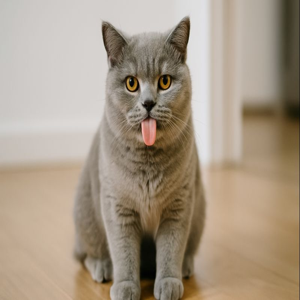

Prediction: Cat


In [ ]:
from PIL import Image
from IPython.display import display

filename = list(uploaded.keys())[0]   # your uploaded file

# open image
img = Image.open(filename)

# resize for small display (thumbnail)
small_img = img.resize((300, 300))   # change size as you like

display(small_img)

print("Prediction:", predict_image(filename))